<h1>Leaf Disease Classification - Keras CNN .. With 96% Accuracy</h1>
<img 
style="width : 100%;margin: auto;"    
src="https://www.google.com/search?q=leaf+disease&sxsrf=ALiCzsb-Fr5LvT82eoxXJt3fDQmP8Qo_cA:1654161628719&source=lnms&tbm=isch&sa=X&ved=2ahUKEwiGpZ-iuI74AhVKBaYKHYEJBIMQ_AUoAXoECAIQAw&biw=1707&bih=806&dpr=1.13#imgrc=BJHS-ZYd7zmuTM&imgdii=O8NuCBPDZa8ipM>

In [3]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import matplotlib.pyplot as plt
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import numpy as np
np.random.seed(0)
import itertools
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

<h1>Data Loading</h1>
<p>Setting up Image Data Generators<p>

In [4]:
#train_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/train",image_size=(256, 256))
#test_gen = image_dataset_from_directory(directory="../input/new-plant-diseases-dataset/valid",image_size=(256, 256))

train_gen = image_dataset_from_directory(directory="/kaggle/input/tomato-leaf-disease/tomato_dataset/train")
test_gen = image_dataset_from_directory(directory="/kaggle/input/tomato-leaf-disease/tomato_dataset/test",
                                        image_size=(256, 256))

rescale = Rescaling(scale=1.0/255)
train_gen = train_gen.map(lambda image,label:(rescale(image),label))
test_gen  = test_gen.map(lambda image,label:(rescale(image),label))

Found 18345 files belonging to 10 classes.
Found 50 files belonging to 10 classes.


In [5]:
import os
path = "/kaggle/input/tomato-leaf-disease/tomato_dataset/train"
classes = os.listdir(path)

In [6]:
for i in range(len(classes)):
    classes[i] = classes[i][9:]
print(classes)

['Late_blight', 'healthy', 'Early_blight', 'Septoria_leaf_spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Bacterial_spot', 'Target_Spot', 'Tomato_mosaic_virus', 'Leaf_Mold', 'Spider_mites Two-spotted_spider_mite']


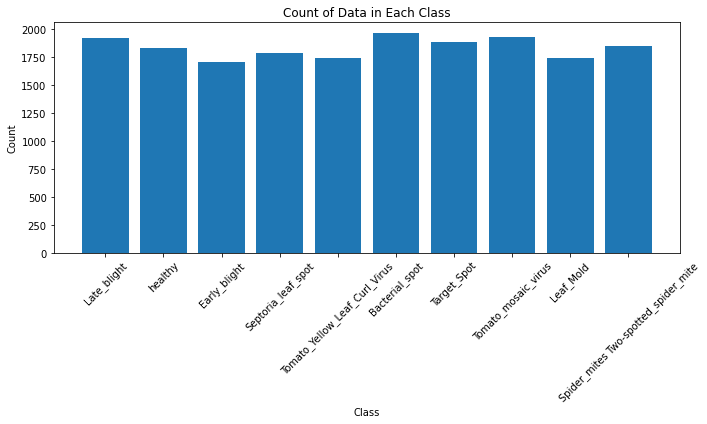

In [7]:
class_names = ['Late_blight', 'healthy', 'Early_blight', 'Septoria_leaf_spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Bacterial_spot', 'Target_Spot', 'Tomato_mosaic_virus', 'Leaf_Mold', 'Spider_mites Two-spotted_spider_mite']

# Count the data in each class
class_counts = {}
for _, labels in train_gen:
    for label in labels.numpy():
        class_counts[label] = class_counts.get(label, 0) + 1

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_counts.values())
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Data in Each Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [8]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Replace 'path/to/your/train_data_directory' with the actual path to your training data directory
train_data_directory = '/kaggle/input/tomato-leaf-disease/tomato_dataset/train'

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_data_directory, target_size=(224, 224), batch_size=32, class_mode='categorical')



Found 18345 images belonging to 10 classes.


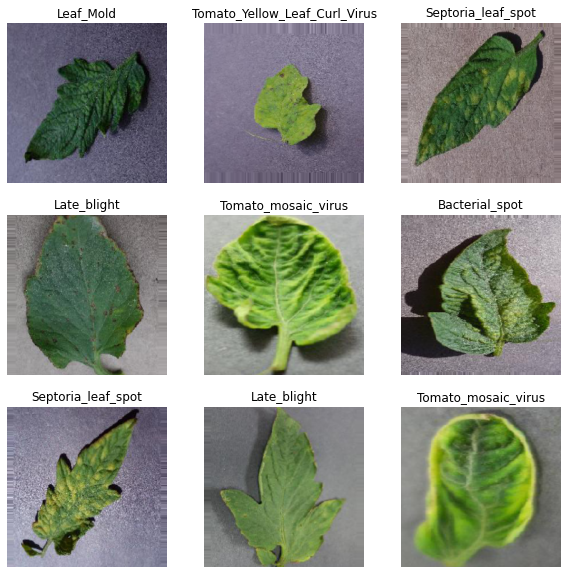

In [9]:
class_map = ['Late_blight', 'healthy', 'Early_blight', 'Septoria_leaf_spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Bacterial_spot', 'Target_Spot', 'Tomato_mosaic_virus', 'Leaf_Mold', 'Spider_mites Two-spotted_spider_mite']

# Create the inverse class map using enumerate
inv_class_map = {v: k for k, v in enumerate(class_map)}

# Visualize the images with their corresponding labels
img, label = next(train_generator)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(img[i])
    label_index = label[i].argmax()
    labels = class_map[label_index]
    ax.set_title(labels)
    ax.axis("off")
plt.show()


<h1>Data Engineering</h1>
<p>Since the data is already augmented, there is no requirement of data engineering. Feature scaling is automatically done by image generators</p>

<h1>Modelling</h1>

In [10]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       7

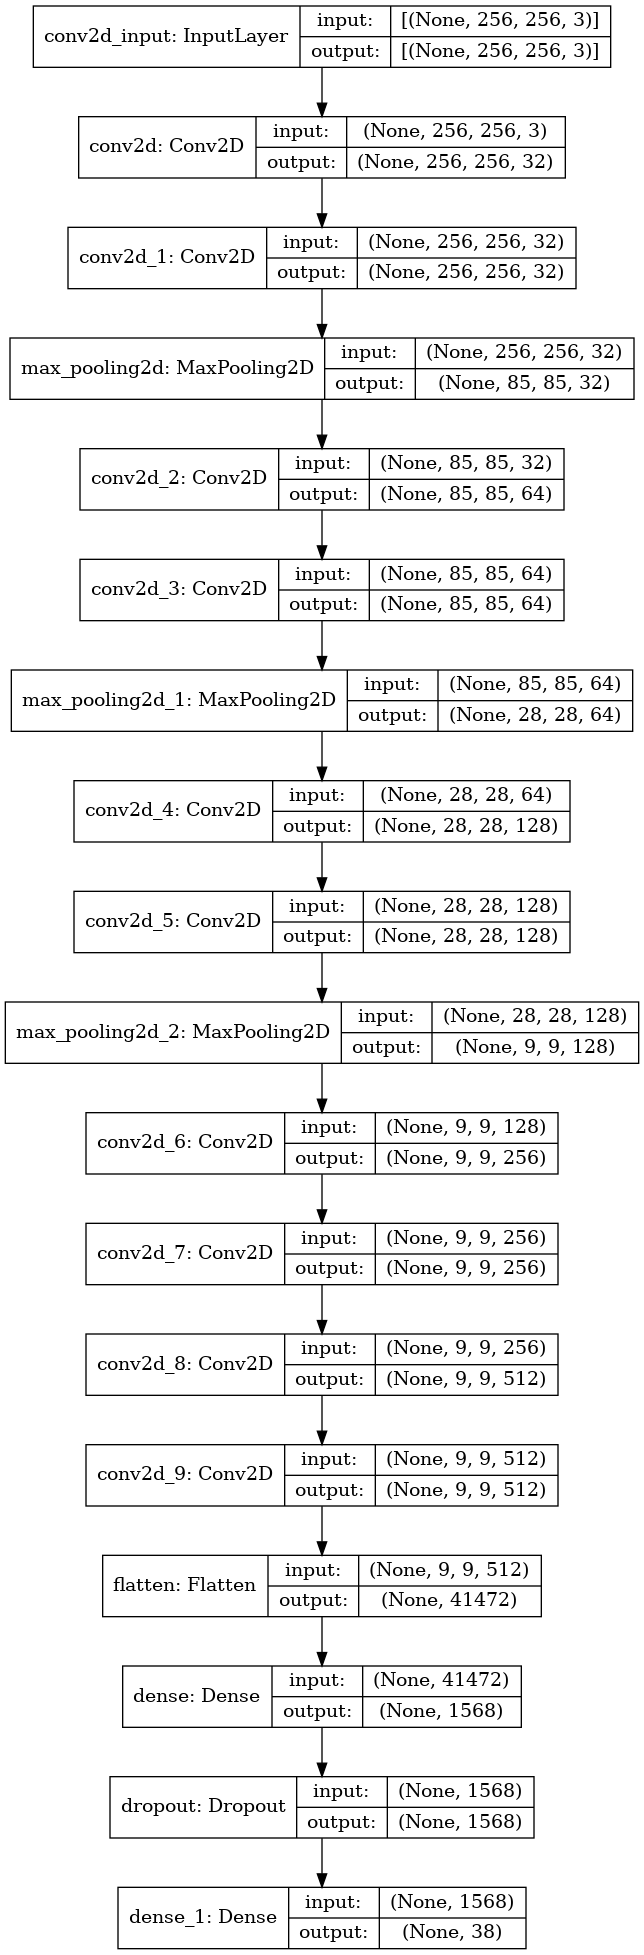

In [11]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

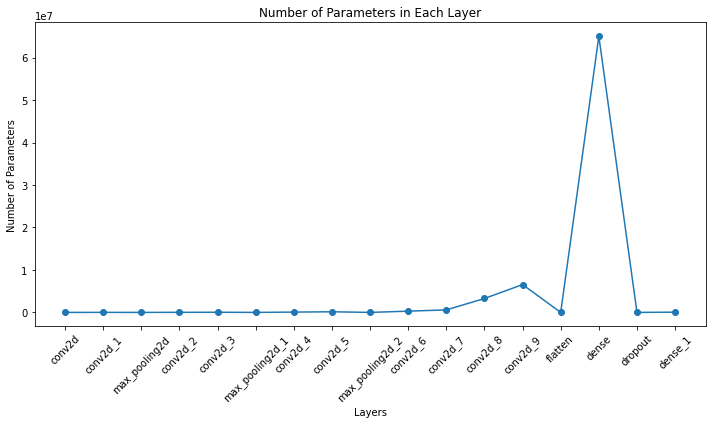

Total number of parameters: 76092966


In [12]:
summary = []
total_params = 0
for layer in model.layers:
    layer_params = layer.count_params()
    total_params += layer_params
    summary.append((layer.name, layer_params))

# Plotting the line graph
layer_names, param_counts = zip(*summary)
plt.figure(figsize=(10, 6))
plt.plot(layer_names, param_counts, marker='o')
plt.xlabel('Layers')
plt.ylabel('Number of Parameters')
plt.title('Number of Parameters in Each Layer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the total number of parameters in the model
print("Total number of parameters:", total_params)

In [13]:
ep = 63
history = model.fit_generator(train_gen,
          validation_data=test_gen,
          epochs = ep)

Epoch 1/63
574/574 [==============================] - 104s 151ms/step - loss: 1.7996 - accuracy: 0.3458 - val_loss: 1.0617 - val_accuracy: 0.6400
Epoch 2/63
574/574 [==============================] - 86s 149ms/step - loss: 0.6876 - accuracy: 0.7562 - val_loss: 0.6820 - val_accuracy: 0.7400
Epoch 3/63
574/574 [==============================] - 86s 149ms/step - loss: 0.4342 - accuracy: 0.8445 - val_loss: 0.4231 - val_accuracy: 0.8200
Epoch 4/63
574/574 [==============================] - 86s 148ms/step - loss: 0.3120 - accuracy: 0.8905 - val_loss: 0.3394 - val_accuracy: 0.8400
Epoch 5/63
574/574 [==============================] - 85s 148ms/step - loss: 0.2298 - accuracy: 0.9188 - val_loss: 0.3205 - val_accuracy: 0.9000
Epoch 6/63
574/574 [==============================] - 86s 149ms/step - loss: 0.1802 - accuracy: 0.9355 - val_loss: 0.3287 - val_accuracy: 0.8800
Epoch 7/63
574/574 [==============================] - 85s 148ms/step - loss: 0.1479 - accuracy: 0.9487 - val_loss: 0.3600 - val_a

<h1>Metrics</h1>

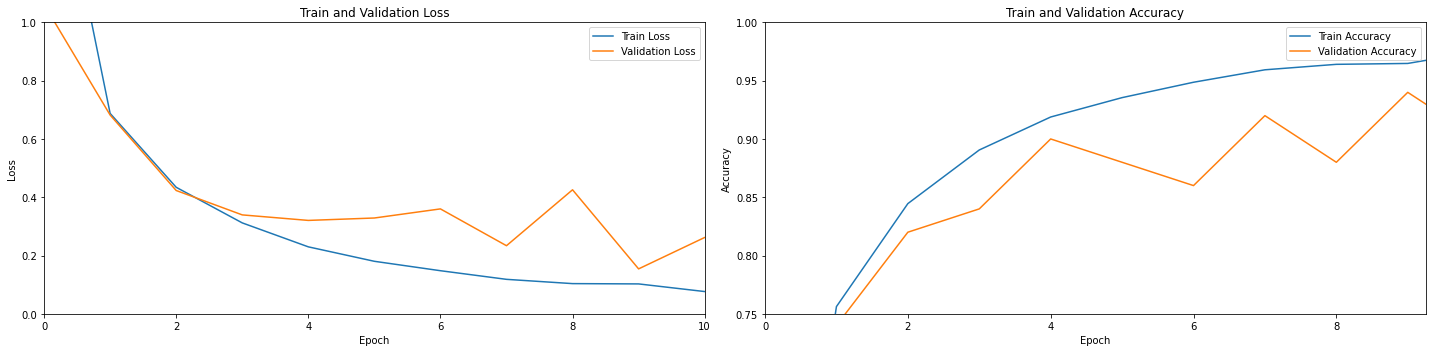

In [14]:
plt.figure(figsize = (20,5))

# Plot for Loss
plt.subplot(1,2,1)
plt.title("Train and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'],label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlim(0, 10)
plt.ylim(0.0,1.0)
plt.legend()

# Plot for Accuracy
plt.subplot(1,2,2)
plt.title("Train and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlim(0, 9.25)
plt.ylim(0.75,1.0)
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [15]:
labels = []
predictions = []
for x,y in test_gen:
    labels.append(list(y.numpy()))
    predictions.append(tf.argmax(model.predict(x),1).numpy())

In [16]:
predictions = list(itertools.chain.from_iterable(predictions))
labels = list(itertools.chain.from_iterable(labels))

In [17]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(labels, predictions) * 100))
print("Precision Score : {:.2f} %".format(precision_score(labels, predictions, average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(labels, predictions, average='micro') * 100))

Train Accuracy  : 99.77 %
Test Accuracy   : 96.00 %
Precision Score : 96.00 %
Recall Score    : 96.00 %


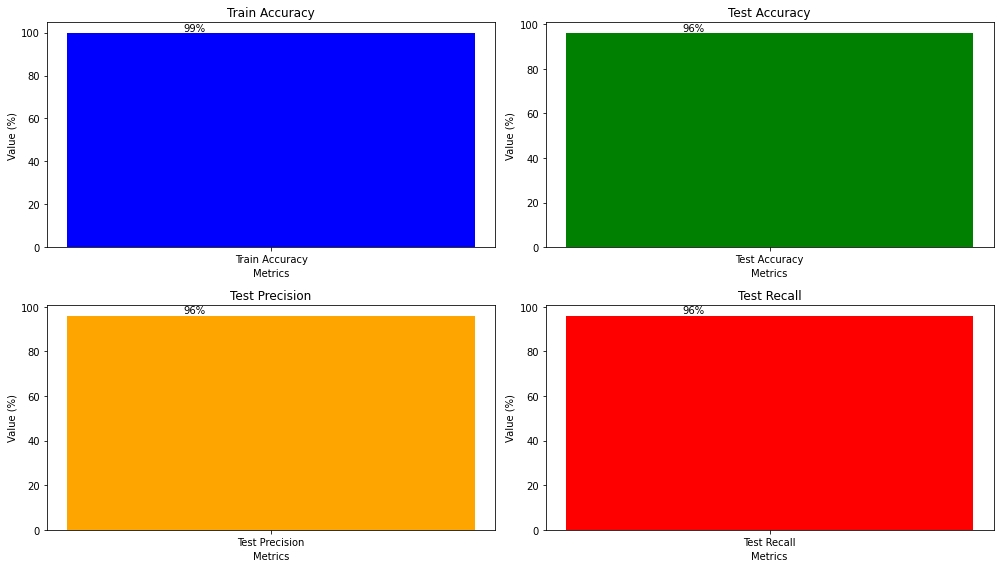

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Example values (replace these with your actual values)
train_accuracy = history.history['accuracy']
test_accuracy = accuracy_score(labels, predictions) * 100
test_precision = precision_score(labels, predictions, average='micro') * 100
test_recall = recall_score(labels, predictions, average='micro') * 100

# Create subplots for train accuracy, test accuracy, precision, and recall
plt.figure(figsize=(14, 8))  # Wider figure for displaying train accuracy

# Train accuracy subplot (bar graph)
plt.subplot(2, 2, 1)
train_accuracy_bar = plt.bar('Train Accuracy', train_accuracy[-1] * 100, color='blue')
plt.xlabel('Metrics')
plt.ylabel('Value (%)')
plt.title('Train Accuracy')
plt.text(train_accuracy_bar[0].get_x() + train_accuracy_bar[0].get_width() / 2 - 0.15, train_accuracy_bar[0].get_height() + 1, f'{int(train_accuracy_bar[0].get_height())}%', ha='center', color='black')

# Test accuracy subplot
plt.subplot(2, 2, 2)
test_accuracy_bar = plt.bar('Test Accuracy', test_accuracy, color='green')
plt.xlabel('Metrics')
plt.ylabel('Value (%)')
plt.title('Test Accuracy')
for bar in test_accuracy_bar:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, f'{int(bar.get_height())}%', ha='center', color='black')

# Precision subplot
plt.subplot(2, 2, 3)
test_precision_bar = plt.bar('Test Precision', test_precision, color='orange')
plt.xlabel('Metrics')
plt.ylabel('Value (%)')
plt.title('Test Precision')
for bar in test_precision_bar:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, f'{int(bar.get_height())}%', ha='center', color='black')

# Recall subplot
plt.subplot(2, 2, 4)
test_recall_bar = plt.bar('Test Recall', test_recall, color='red')
plt.xlabel('Metrics')
plt.ylabel('Value (%)')
plt.title('Test Recall')
for bar in test_recall_bar:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, f'{int(bar.get_height())}%', ha='center', color='black')

plt.tight_layout()
plt.show()

<h3>Confusion Matrix</h3>

<Figure size 720x576 with 0 Axes>

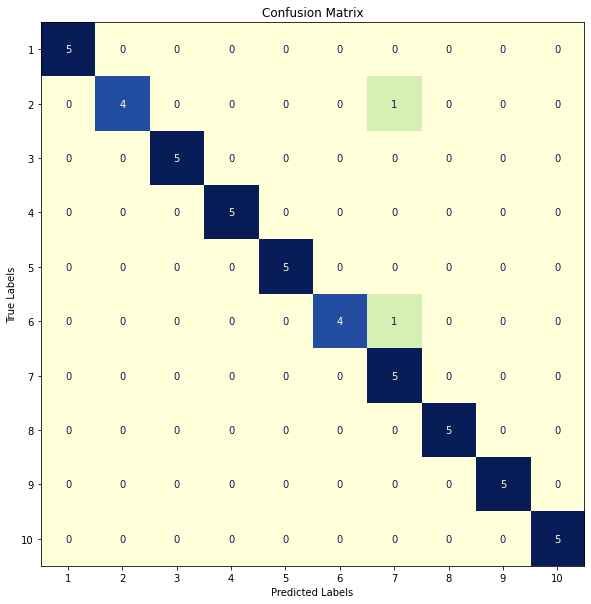

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming `labels` and `predictions` contain the true labels and predicted labels, respectively.

plt.figure(figsize=(10, 8))
cm = confusion_matrix(labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1, 11)))  # Assuming you have 38 classes.
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, colorbar=False, cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [20]:
model_name = model.input_names[0][:-6]
subject = input('Enter Project Subject')
acc = (accuracy_score(labels, predictions) * 100)
save_path = "/kaggle/working/"

# Save model
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'model was saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'weights were saved as {weights_save_loc}')

Enter Project Subject minor project model


model was saved as /kaggle/working/conv2d-minor project model-96.00.h5
weights were saved as /kaggle/working/conv2d-minor project model-weights.h5
